In [1]:
import numpy as np
import pandas as pd

### EDA with pandas.

В этом задании предлагается сделать разведочный анализ данных в датафрейме твитов. 

 Таблица состоит из 12 столбцов:


- `id`: уникальный номер сообщения в системе twitter;
- `tdate`: дата публикации сообщения (твита);
- `tmane`: имя пользователя, опубликовавшего сообщение;
- `ttext`:  текст сообщения (твита);
- `ttype`: тональность твита (положительная (1) или отрицательная (-1));
- `trep`: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
- `tfav`: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
- `tstcount`: число всех сообщений пользователя в сети twitter;
- `tfol`: количество фолловеров пользователя (тех людей, которые читают пользователя);
- `tfrien`: количество друзей пользователя (те люди, которых читает пользователь);
- `listcount`: количество листов-подписок в которые добавлен твиттер-пользователь.


In [2]:
df = pd.read_csv("./tweets.csv")
df.head(5)

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount
0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11
1,409580147185315840,1386486491,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86
2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18
3,410625694087909376,1386735769,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537
4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48


In [3]:
df.shape

(226834, 11)

__Задание 1__. Создайте новый признак - колонку `'diffr'`, содержащую разницу числа друзей и числа фолловеров у пользователя.

In [4]:
df['diffr'] = df['tfrien'] - df['tfol']

__Задание 2__. Создайте датафрейм, в котором остались только строки с чётными номерами, и пронумеруйте их начиная с 0.

In [5]:
df1 = df[0:11:2].reset_index()
df1.head()

,index,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,diffr
0,0,410745723928731648,1386764386,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,-274
1,2,419794699738570752,1388921830,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,-702
2,4,410849586635628545,1386789149,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,-3187
3,6,415545552320077824,1387908754,VitaVita52,"Было неожиданно,все попадали на концерте,никог...",-1,0,0,0,461,16,19,-445
4,8,413821842823348224,1387497790,wyhuzezyg,RT @yvysogoga: мда. центос это стабильность......,-1,0,3,0,641,385,386,-256


__Задание 3__. Создайте датафрейм, в котором оставить только твиты положительной тональности и колонки [ Твит, тональность]

In [6]:
new_df = df[df['ttype'] == 1][['ttext', 'ttype']]
new_df.head()

,ttext,ttype
0,RT @dianochka6464ru: Россия отмочила! Смотреть...,1
3,"RT @boobear1236969: Линта,я слева:D http://t.c...",1
4,"@juliasvirid17 я имел ввиду, что для меня спос...",1
15,как всегда круто посидели на химии:) http://t....,1
17,"Сегодняшнее творение ,больше половины уже нет ...",1


__Задание 4__. Найдите число уникальных пользователей (пользователей с различными `tmane`).

__Хинт__: воспользуйтесь `np.unique`.

In [7]:
len(df['tmane'].unique())

139658

__Задание 5__. Посчитайте основные статистики по числу подписчиков (фолловеров) при помощи метода `.describe()`. Постройте гистограмму значений признака.
Сделайте выводы в отдельной ячейке. 

In [8]:
df['tfol'].describe()

count    2.268340e+05
mean     7.584972e+03
std      2.039972e+04
min      0.000000e+00
25%      4.730000e+02
50%      2.026000e+03
75%      7.562000e+03
max      1.138639e+06
Name: tfol, dtype: float64

<AxesSubplot:>

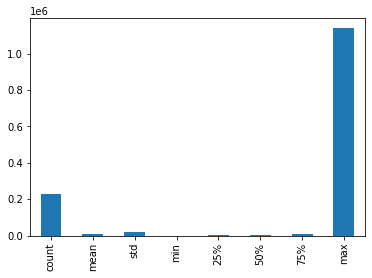

In [9]:
df['tfol'].describe().plot.bar()

__Задание 6__. Посчитайте число ретвитов в датасете (твитов, начинающихся с "RT @").

In [10]:
df[df['ttext'].str.startswith("RT @")].shape[0]

36462

__Задание 7__. Перенесите ретвиты в другой датасет

In [11]:
retwitts = df[df['ttext'].str.startswith("RT @")]

__Задание 8__. Постройте столбчатую диаграмму (или гистограмму) распределения числа твитов по месяцам. В какой месяц какого года было опубликовано больше всего твитов?

__Хинт__: Время в колонке `tdate` — это Unix time, и оно отображает то, сколько секунд прошло с 00:00:00 1 января 1970 года. Для конвертации этого времени в удобный формат воспользуйтесь библиотекой `datetime`.

In [12]:
df['tdate'] = pd.to_datetime(df['tdate'],unit='s')
df['tdate'] = df['tdate'].apply(lambda x: int(str(x).split("-")[1]))

In [13]:
df.head(5)

,id,tdate,tmane,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,diffr
0,410745723928731648,12,chavdaridi,RT @dianochka6464ru: Россия отмочила! Смотреть...,1,0,1,0,285,11,11,-274
1,409580147185315840,12,pifelanybal,Google сменил алгоритм чексуммы в загребании P...,-1,0,0,0,130,100,86,-30
2,419794699738570752,1,RomanenkoJulya,"мне надо домой, @RomaRudenko1 не отпускает(",-1,0,0,0,730,28,18,-702
3,410625694087909376,12,VizivayuDyavola,"RT @boobear1236969: Линта,я слева:D http://t.c...",1,0,3,0,1959,405,537,-1554
4,410849586635628545,12,Den_Byhovsky,"@juliasvirid17 я имел ввиду, что для меня спос...",1,0,0,0,3248,61,48,-3187


In [14]:
d = df.groupby("tdate").describe()

In [15]:
d['id']['count']

tdate
1      39205.0
12    187629.0
Name: count, dtype: float64

<AxesSubplot:xlabel='tdate'>

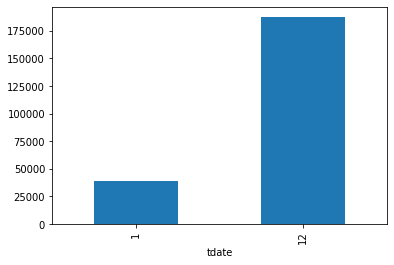

In [16]:
d['id']['count'].plot.bar()